### 0. 데이터 적재 및 변수 타입 파악

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [23]:
# 모든 열 출력
pd.set_option('display.max_columns',None)

In [24]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [25]:
df.shape

(1470, 35)

- <I>수치형 변수처럼 보이지만 범주형 변수인 경우가 있다<I>
    - 예를 들어, Education은 1~5이지만 이는 교육 수준을 말하며 학사, 석사, 박사처럼 범주형에 해당된다.
    - 이에 따라, 수치형 변수들에서도 범주형 변수가 있는지 확인하고 작업해야한다!

In [26]:
for i in df.columns:
    print('<',i,'>')
    print(df[i].unique()[:10])
    print('\n')

< Age >
[41 49 37 33 27 32 59 30 38 36]


< Attrition >
['Yes' 'No']


< BusinessTravel >
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


< DailyRate >
[1102  279 1373 1392  591 1005 1324 1358  216 1299]


< Department >
['Sales' 'Research & Development' 'Human Resources']


< DistanceFromHome >
[ 1  8  2  3 24 23 27 16 15 26]


< Education >
[2 1 4 3 5]


< EducationField >
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


< EmployeeCount >
[1]


< EmployeeNumber >
[ 1  2  4  5  7  8 10 11 12 13]


< EnvironmentSatisfaction >
[2 3 4 1]


< Gender >
['Female' 'Male']


< HourlyRate >
[94 61 92 56 40 79 81 67 44 84]


< JobInvolvement >
[3 2 4 1]


< JobLevel >
[2 1 3 4 5]


< JobRole >
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


< JobSatisfaction >
[4 2 3 1]


< MaritalStatus >
['Single' 'Married'

In [27]:
# Kaggle Dataset 소개에 따라 수치형 변수의 범주화 진행
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


---

### 1. 결측치, 이상치 검토

#### 1-1. 결측치

In [8]:
# 결측치
missing_values = df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [32]:
for col in df.columns:
    print('<',col,'>')
    print(df[col].value_counts()[:10])
    print('\n')

< Age >
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
Name: Age, dtype: int64


< Attrition >
No     1233
Yes     237
Name: Attrition, dtype: int64


< BusinessTravel >
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


< DailyRate >
691     6
408     5
530     5
1329    5
1082    5
329     5
829     4
1469    4
267     4
217     4
Name: DailyRate, dtype: int64


< Department >
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


< DistanceFromHome >
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
Name: DistanceFromHome, dtype: int64


< Education >
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64


< EducationField >
Life Sciences       606
Medical             464
Marketing 

#### 1-2. 이상치

In [33]:
# 수치형 변수 컬럼
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

constant_cols = [col for col in numeric_cols if df[col].nunique() == 1]
variable_numeric_cols = [col for col in numeric_cols if col not in constant_cols]

# 기초 통계량
df[variable_numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0


##### 1-2-1. IQR 방식

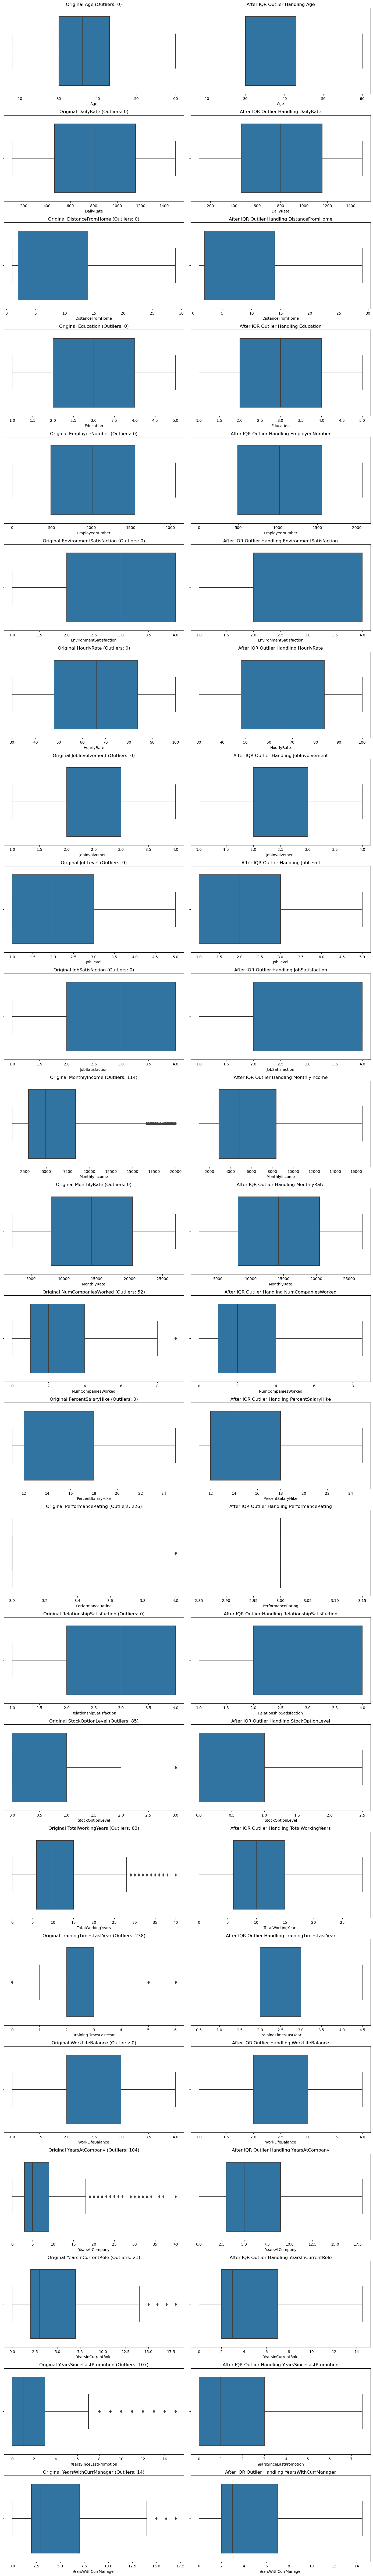

In [11]:
# Create a copy of the dataframe to apply outlier removal
df_iqr = df.copy()

# IQR 방식
def handle_outliers_iqr(col, dataframe):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Replace outliers with the lower and upper bounds
    dataframe.loc[(dataframe[col] < lower_bound), col] = lower_bound
    dataframe.loc[(dataframe[col] > upper_bound), col] = upper_bound

    return outlier_count

# 시각화
fig, axes = plt.subplots(len(variable_numeric_cols), 2, figsize=(14, len(variable_numeric_cols)*4))

for idx, col in enumerate(variable_numeric_cols):
    # Original data
    sns.boxplot(x=df[col], ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Original {col} (Outliers: {handle_outliers_iqr(col, df_iqr)})")

    # Data after outlier handling
    sns.boxplot(x=df_iqr[col], ax=axes[idx, 1])
    axes[idx, 1].set_title(f"After IQR Outlier Handling {col}")

plt.tight_layout()
plt.show()

##### 1-2-2.  표준점수로 변환 후 -3이하 및 +3 제거

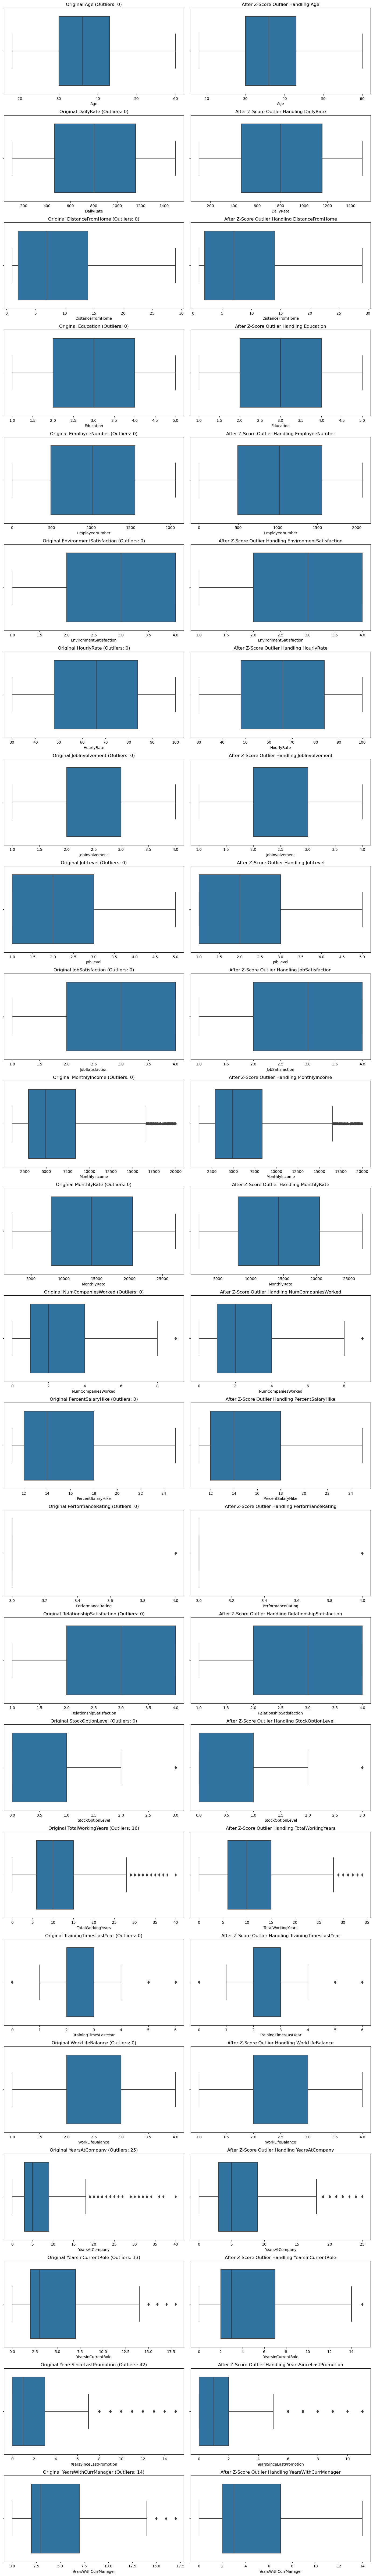

In [12]:
from scipy.stats import zscore

# Create a copy of the dataframe to apply outlier removal
df_zscore = df.copy()

# Define a function to detect and handle outliers using the z-score method
def handle_outliers_zscore(col, dataframe):
    z_scores = zscore(dataframe[col])
    abs_z_scores = np.abs(z_scores)

    outliers = dataframe[abs_z_scores > 3]
    outlier_count = outliers.shape[0]

    # Replace outliers with NaN
    dataframe.loc[(abs_z_scores > 3), col] = np.nan

    return outlier_count

# Create subplots
fig, axes = plt.subplots(len(variable_numeric_cols), 2, figsize=(14, len(variable_numeric_cols)*4))

for idx, col in enumerate(variable_numeric_cols):
    # Original data
    sns.boxplot(x=df[col], ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Original {col} (Outliers: {handle_outliers_zscore(col, df_zscore)})")

    # Data after outlier handling
    sns.boxplot(x=df_zscore[col], ax=axes[idx, 1])
    axes[idx, 1].set_title(f"After Z-Score Outlier Handling {col}")

plt.tight_layout()
plt.show()

##### 1-2-3.  표준화 후 PCA와 DBSCAN 알고리즘으로 제거

In [34]:
# 수치형 컬럼만 선택
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# 표준화
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)

# 수치형 컬럼만 데이터 프레임화
numeric_scaled = pd.DataFrame(numeric_scaled, columns=numeric_columns.columns)

numeric_scaled.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,0.0,-1.701283,1.383138,-0.108350,0.726020,2.125136,-1.150554,0.0,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,0.0,-1.699621,-0.240677,-0.291719,1.488876,-0.678049,2.129306,0.0,0.241988,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,0.0,-1.696298,1.284725,-0.937654,-1.674841,1.324226,-0.057267,0.0,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,0.0,-1.694636,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,0.0,-0.932014,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,0.0,-1.691313,-1.274014,-0.644858,0.325900,2.525591,-0.877232,0.0,0.241988,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


- DBSCAN이란?
    - 데이터의 밀도에 기반한 클러스터링 알고리즘입니다.<br>데이터 포인트의 밀도를 계산하여,<br>데이터 포인트의 밀도가 일정 수준 이상이면 그 데이터 포인트를 클러스터의 일부로 간주합니다.

- DBSCAN은 다음과 같은 주요 특징

    - 클러스터의 수를 미리 정의할 필요가 없습니다: DBSCAN은 데이터의 분포에 따라 클러스터의 수를 자동으로 결정합니다.
    - 임의의 형태의 클러스터를 찾을 수 있습니다: DBSCAN은 k-means와 같은 알고리즘과 달리 원형의 클러스터만 찾지 않고, 임의의 형태의 클러스터를 찾을 수 있습니다.
    - 이상치를 처리할 수 있습니다: DBSCAN은 밀도가 낮은 영역의 데이터 포인트를 이상치로 간주하여, 이상치 탐지에도 사용할 수 있습니다.

- DBSCAN은 다음과 같은 두 개의 주요 매개변수

    - `eps`: 이 매개변수는 클러스터의 최대 반경을 정의합니다. `eps` 거리 내에 있는 데이터 포인트의 수가 `min_samples` 이상이면, 그 데이터 포인트를 클러스터의 일부로 간주합니다.
    - `min_samples`: 클러스터를 형성하는 데 필요한 최소 데이터 포인트의 수를 정의합니다.

이러한 특징 때문에 DBSCAN은 공간적 클러스터링과 이상치 탐지에 효과적인 알고리즘이라고 할 수 있습니다.<br><br>

<div style="text-align: center;">
    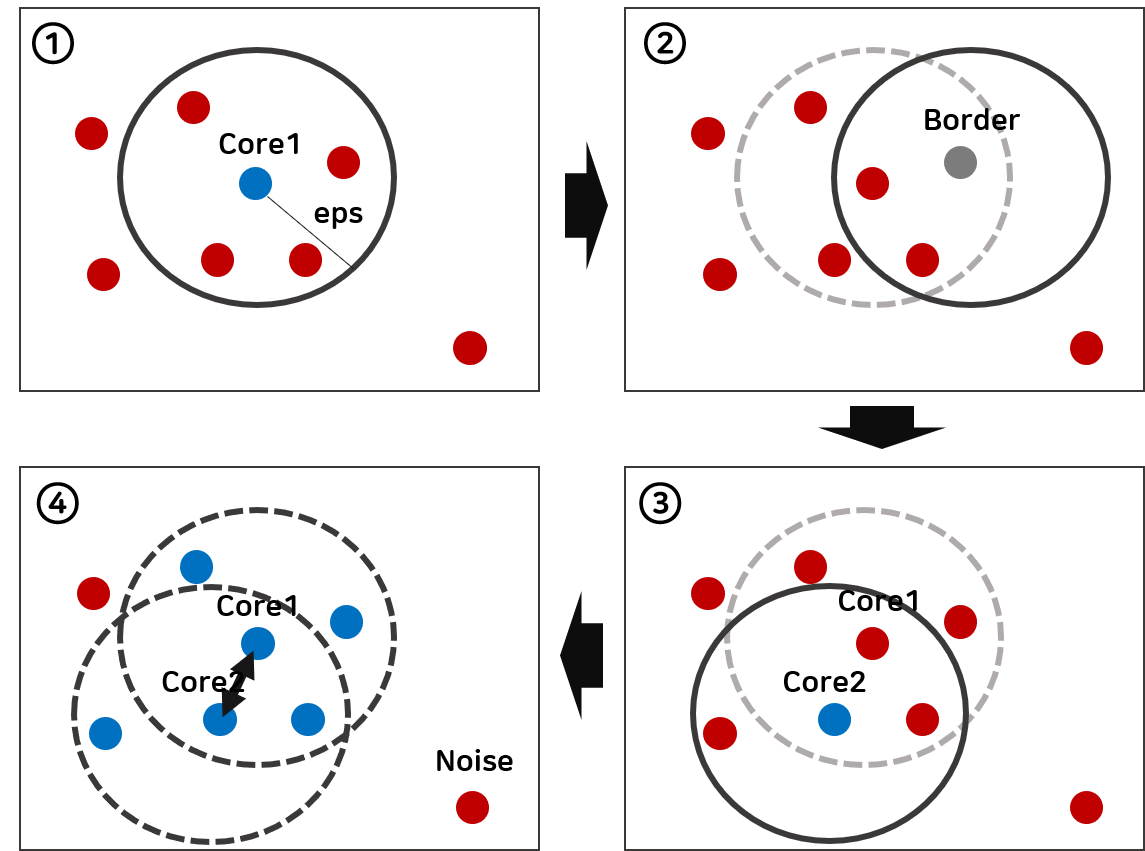<br>
    (이미지 출처: <a href="https://yganalyst.github.io/ml/ML_clustering/">https://yganalyst.github.io/ml/ML_clustering/</a>)
</div>

In [35]:
# DBSCAN
dbscan = DBSCAN(eps=3.0, min_samples=5)
clusters = dbscan.fit_predict(numeric_scaled)

# 이상치 수
outliers = (clusters == -1).sum() # (clusters == -1) -1일 경우, 클러스터에 속하지 않음

outliers

201

- PCA (Principal Component Analysis)란?
    - 즉 주성분 분석은 고차원 데이터를 저차원 데이터로 변환하는 데 사용되는 통계적 방법입니다.<br>PCA는 데이터의 분산이 최대가 되는 방향으로 축을 회전시키며, 이렇게 생성된 새로운 축을 주성분이라고 합니다.<br>이 주성분들은 원래의 특성들의 선형 조합으로 이루어져 있습니다.

- PCA 주요 특징

    - 데이터의 차원 축소: PCA는 고차원의 데이터를 저차원의 데이터로 축소시키는 데 주로 사용됩니다. 이는 데이터를 시각화하거나, 머신러닝 모델의 성능을 향상시키는 데 도움이 될 수 있습니다.
    - 정보 손실 최소화: PCA는 원본 데이터의 분산을 최대한 보존하려고 합니다. 이는 원본 데이터의 정보를 최대한 보존하면서 차원을 축소하는 데 도움이 됩니다.
    - 상관관계 감소: PCA는 변환된 데이터의 특성들이 서로 직교하도록 만듭니다. 이는 변환된 특성들 사이의 상관관계를 제거합니다.

PCA는 이러한 특징 때문에 데이터 전처리, 시각화, 특성 추출 등 다양한 분야에서 널리 사용됩니다.

- PCA의 축(차원)
    - 원본 데이터의 분산이 가장 큰 방향을 나타내는 벡터입니다.<br>첫 번째 주성분은 데이터의 분산이 가장 큰 방향을 찾아내고, 두 번째 주성분은 그 다음으로 분산이 큰 방향을 찾아냅니다.<br>이 과정은 원하는 차원의 수만큼 계속되며, 각 주성분은 이전의 주성분들과 직교(orthogonal)하게 설정됩니다.<br><br>

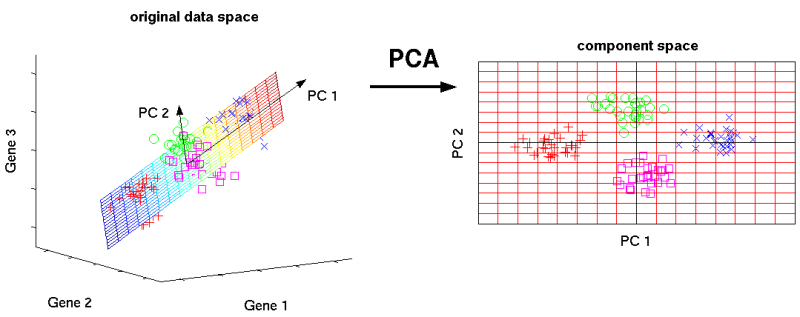

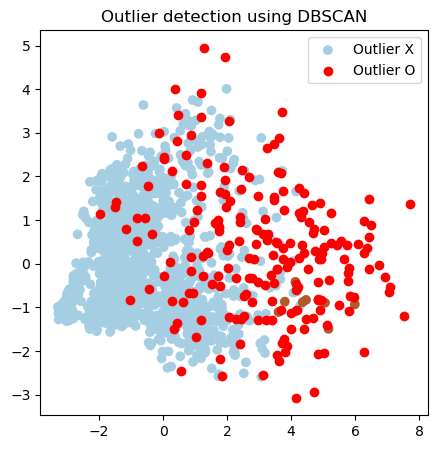

In [41]:
# 2차원으로 데이터 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_scaled)

# Plot the reduced data and highlight the outliers
plt.figure(figsize=(5, 5))

# 이상치인 경우
plt.scatter(reduced_data[clusters != -1, 0], reduced_data[clusters != -1, 1], 
            c=clusters[clusters != -1], cmap='Paired', label='Outlier X')

# 이상치 아닌 경우
plt.scatter(reduced_data[clusters == -1, 0], reduced_data[clusters == -1, 1], 
            color='red', label='Outlier O')

plt.legend()
plt.title('Outlier detection using DBSCAN')
plt.show()

- 시각화된 결과물을 봤을 때<br>대체로 좌하단 방향으로 몰려있으며, 우상단에 가까운 데이터는 이상치로 파악됨을 알 수 있음

<div style="text-align: center;">
    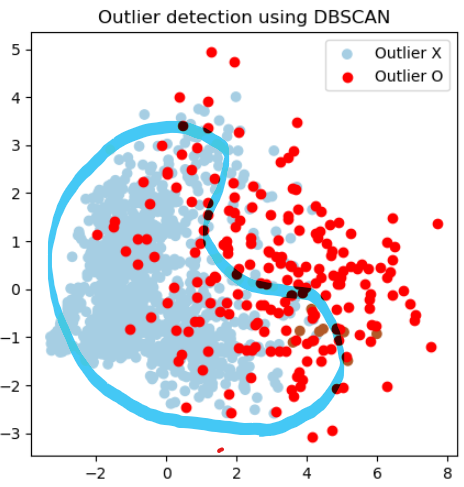
</div>

In [37]:
# DBSCAN 알고리즘을 이용하여 파악된 이상치 제거하기
# 이상치에 대한 boolean mask 생성
outlier_mask = (clusters == -1)

# 이상치 데이터 추출
data_without_outliers = numeric_scaled[~outlier_mask]

data_without_outliers.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,0.0,-1.701283,1.383138,-0.108350,0.726020,2.125136,-1.150554,0.0,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,0.0,-1.699621,-0.240677,-0.291719,1.488876,-0.678049,2.129306,0.0,0.241988,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,0.0,-1.696298,1.284725,-0.937654,-1.674841,1.324226,-0.057267,0.0,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,0.0,-1.694636,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,0.0,-0.932014,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,0.0,-1.691313,-1.274014,-0.644858,0.325900,2.525591,-0.877232,0.0,0.241988,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


---

### 2. 유의미한 시각화 5개 이상

C:\Users\dhj98\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


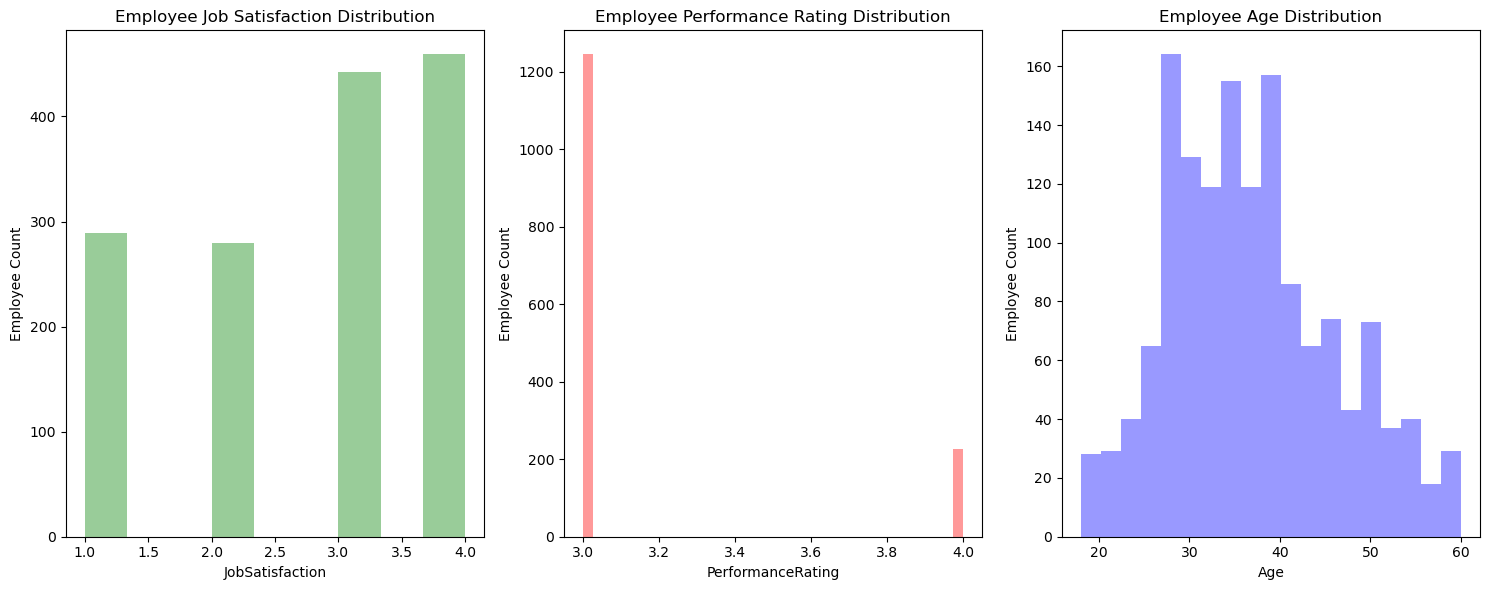

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.JobSatisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Job Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.PerformanceRating, kde=False, color="r", ax=axes[1]).set_title('Employee Performance Rating Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.Age, kde=False, color="b", ax=axes[2]).set_title('Employee Age Distribution')
axes[2].set_ylabel('Employee Count')

plt.tight_layout()
plt.show()

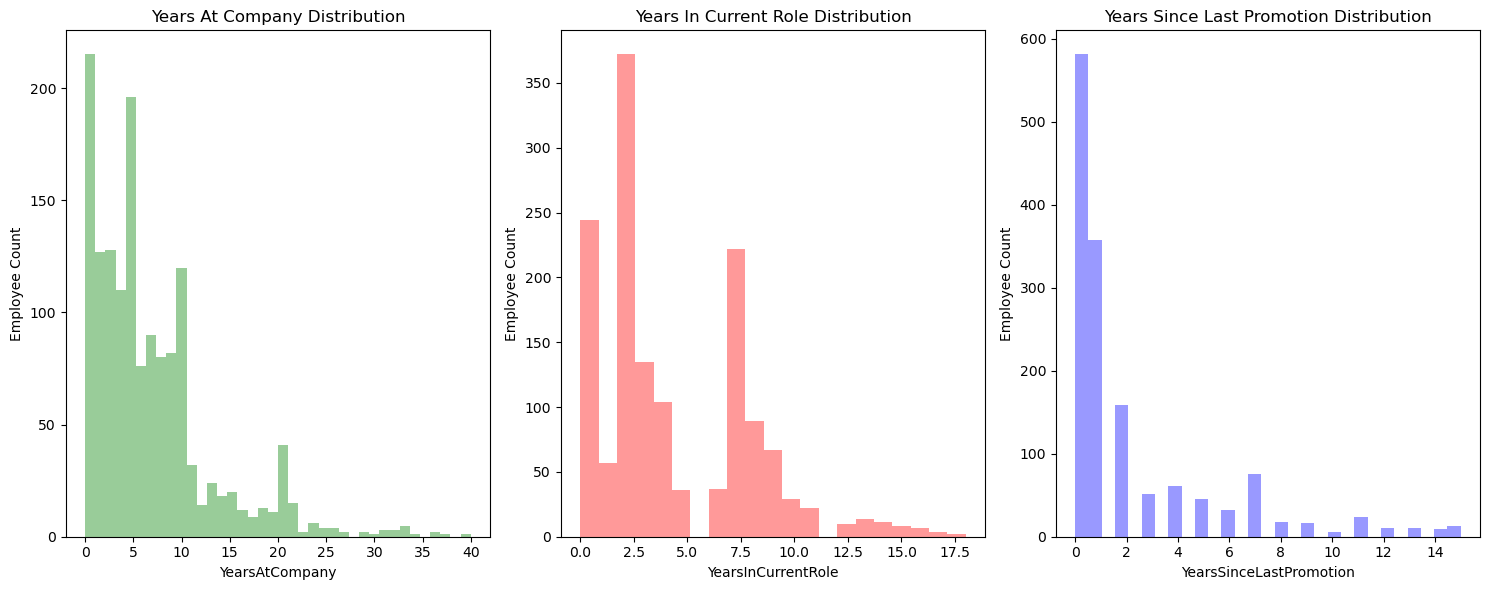

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Years at company
sns.distplot(df.YearsAtCompany, kde=False, color="g", ax=axes[0]).set_title('Years At Company Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Years in current role
sns.distplot(df.YearsInCurrentRole, kde=False, color="r", ax=axes[1]).set_title('Years In Current Role Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Years since last promotion
sns.distplot(df.YearsSinceLastPromotion, kde=False, color="b", ax=axes[2]).set_title('Years Since Last Promotion Distribution')
axes[2].set_ylabel('Employee Count')

plt.tight_layout()
plt.show()

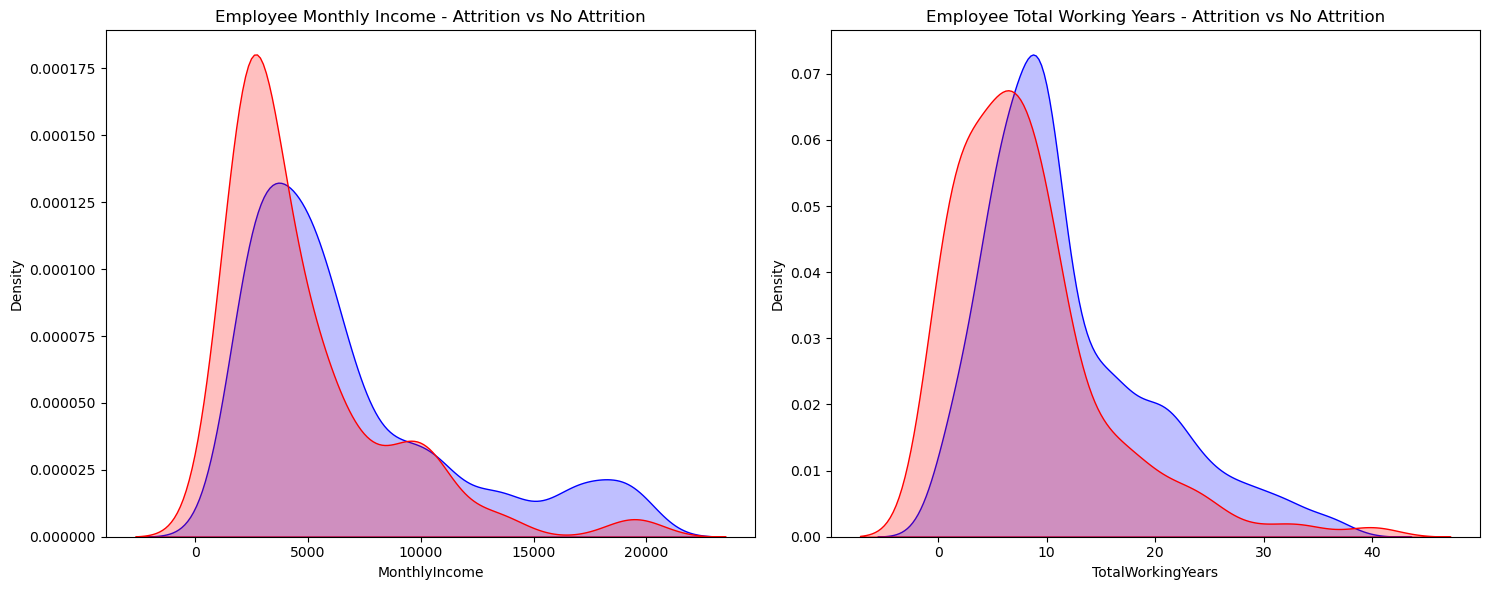

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Graph for monthly income
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee', color="b", shade=True, ax=axes[0])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees', color="r", shade=True, ax=axes[0])
axes[0].set_title('Employee Monthly Income - Attrition vs No Attrition')

# Graph for total working years
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee', color="b", shade=True, ax=axes[1])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees', color="r", shade=True, ax=axes[1])
axes[1].set_title('Employee Total Working Years - Attrition vs No Attrition')

plt.tight_layout()
plt.show()

---

### 3. 수치형 변수 간 상관관계 파악

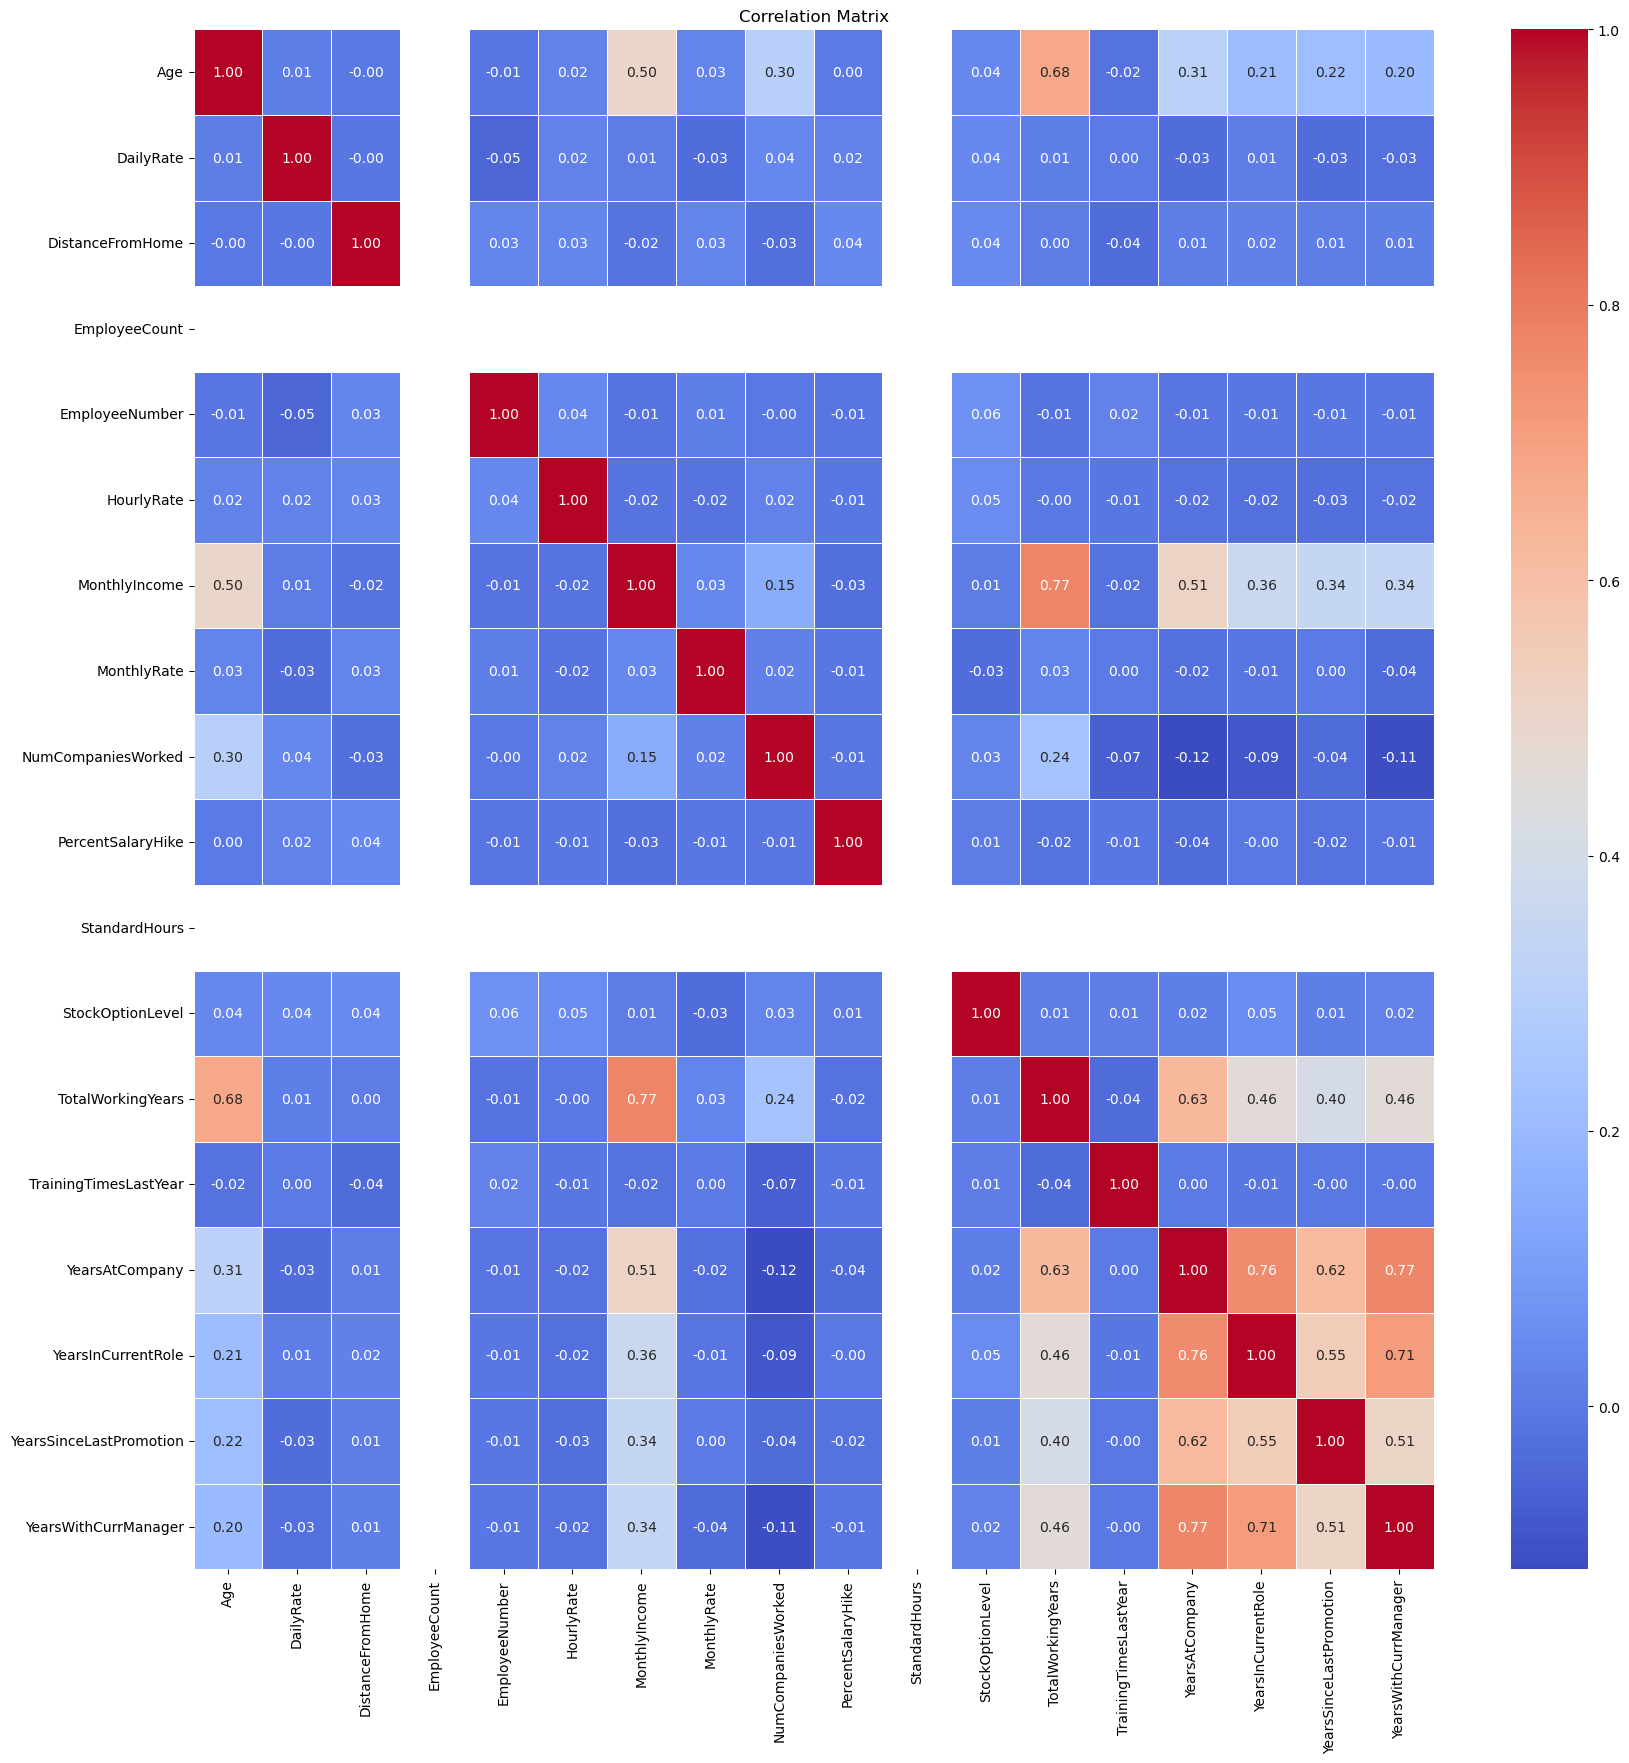

In [40]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

---

### 4. 파생변수 생성